In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wilcoxon, ttest_1samp

In [ ]:
"""Without diagonalization. No LM"""

testCER1 = np.array([22.53, 12.81, 10.31, 12.40, 11.66, 7.91, 23.31, 21.03])
valCER1 = np.array([20.59, 10.27, 11.07, 12.48, 12.30, 10.71, 25.22, 22.62])

In [3]:
"""Without diagonalization. LM"""

testCER2 = np.array([15.74, 6.06, 5.58, 6.21, 5.23, 3.46, 14.35, 13.04])
valCER2 = np.array([14.97, 6.62, 7.29, 7.35, 7.45, 7.04, 17.96, 15.14])

In [4]:
"""With diagonalization. No LM"""

testCER3 = np.array([22.59, 11.35, 10.37, 10.73, 9.80, 6.86, 22.41, 18.15])
valCER3 = np.array([18.49, 9.77, 11.39, 10.55, 10.74, 9.65, 24.03, 19.98])

In [5]:
"""With diagonalization. LM"""

testCER4 = np.array([15.41, 5.80, 5.55, 4.91, 4.01, 2.96, 14.47, 10.48])
valCER4= np.array([13.22, 6.32, 7.06, 6.87, 6.93, 6.59, 16.82, 13.07])

In [6]:
print(np.mean(testCER1), np.std(testCER1))
print(np.mean(valCER1), np.std(valCER1))

15.245000000000001 5.663629578282817
15.6575 5.702683030819791


In [7]:
print(np.mean(testCER2), np.std(testCER2))
print(np.mean(valCER2), np.std(valCER2))

8.70875 4.510012299040879
10.477500000000001 4.3833940901999675


In [8]:
print(np.mean(testCER3), np.std(testCER3))
print(np.mean(valCER3), np.std(valCER3))

14.032499999999999 5.714478869503325
14.325000000000001 5.26585700527464


In [9]:
print(np.mean(testCER4), np.std(testCER4))
print(np.mean(valCER4), np.std(valCER4))

7.94875 4.536114630110222
9.61 3.84260328423323


In [10]:
""" emg2qwerty no LM. """

testCER5 = np.array([26.6, 14.15, 11.12, 13.25, 10.51, 7.648, 18.82, 20.94])
valCER5 = np.array([24.13, 11.31, 10.05, 14.61, 10.64, 9.363, 22.2, 22.91])

In [11]:
""" emg2qwerty LM. """

testCER6 = np.array([20.72, 7.959, 6.778, 7.29, 4.851, 3.824, 11.66, 13.28])
valCER6 = np.array([18.45, 7.612, 7.183, 9.928, 6.985, 6.869, 15.2, 16.01])

In [12]:
print(np.mean(testCER5), np.std(testCER5))
print(np.mean(valCER5), np.std(valCER5))

15.379750000000001 5.877220043311294
15.651625 5.952144024162638


In [13]:
print(np.mean(testCER6), np.std(testCER6))
print(np.mean(valCER6), np.std(valCER6))

9.54525 5.163867996715252
11.029625 4.4527825833264085


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
method1 = testCER6
method2 = testCER2
method3 = testCER4

subjects = list(range(8))  
methods = ['Sivakumar et al.', 'SPD Cov matrices', '+ Diagonalization']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  

data = []
for i, subjID in enumerate(subjects):
    data.append((subjID, methods[0], method1[i]))
    data.append((subjID, methods[1], method2[i]))
    data.append((subjID, methods[2], method3[i]))

df = pd.DataFrame(data, columns = ['Subject', 'Method', 'CER'])

In [52]:
print(method1)
print(method2)
print(method3)

[20.72   7.959  6.778  7.29   4.851  3.824 11.66  13.28 ]
[15.74  6.06  5.58  6.21  5.23  3.46 14.35 13.04]
[15.41  5.8   5.55  4.91  4.01  2.96 14.47 10.48]


/tmp/ipykernel_1666348/4089340974.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


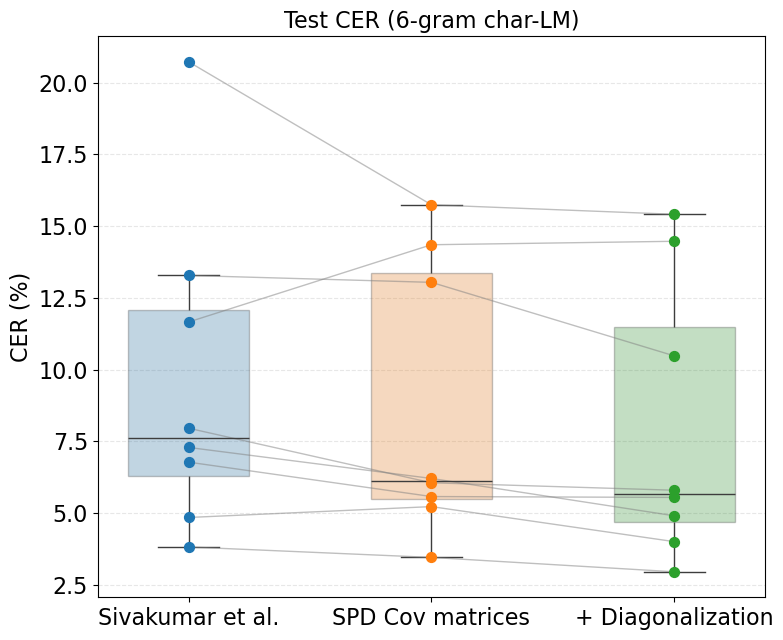

In [53]:
methodOrder = methods
method2idx = {m: i for i, m in enumerate(methodOrder)}

plt.figure(figsize=(8, 6.5))

sns.boxplot(
    x='Method', y='CER', data=df,
    order=methodOrder,
    palette=colors,
    width=0.5,
    showfliers=False,
    boxprops=dict(alpha=0.3)
)

for subjID in subjects:
    subjDF = df[df['Subject'] == subjID]
    xVals = subjDF['Method'].map(method2idx).values
    yVals = subjDF['CER'].values

    plt.plot(xVals, yVals, color='gray', alpha=0.5, linewidth=1)

    for i in range(len(methods)):
        plt.scatter(
            xVals[i], yVals[i],
            color=colors[i], s=50, zorder=3
        )

plt.xticks(ticks=np.arange(3), labels=methods, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("CER (%)", fontsize=16)
plt.title("Test CER (6-gram char-LM)", fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("testCER-LM.pdf", bbox_inches="tight", dpi=300)
plt.show()


In [47]:
method4 = testCER5
method5 = testCER1
method6 = testCER3

In [48]:
print(method4)
print(method5)
print(method6)

[26.6   14.15  11.12  13.25  10.51   7.648 18.82  20.94 ]
[22.53 12.81 10.31 12.4  11.66  7.91 23.31 21.03]
[22.59 11.35 10.37 10.73  9.8   6.86 22.41 18.15]


In [49]:
subjects = list(range(8))  
methods = ['Sivakumar et al.', 'SPD Cov matrices', '+ Diagonalization']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  

data = []
for i, subjID in enumerate(subjects):
    data.append((subjID, methods[0], method4[i]))
    data.append((subjID, methods[1], method5[i]))
    data.append((subjID, methods[2], method6[i]))

df = pd.DataFrame(data, columns = ['Subject', 'Method', 'CER'])

/tmp/ipykernel_1666348/4268574227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


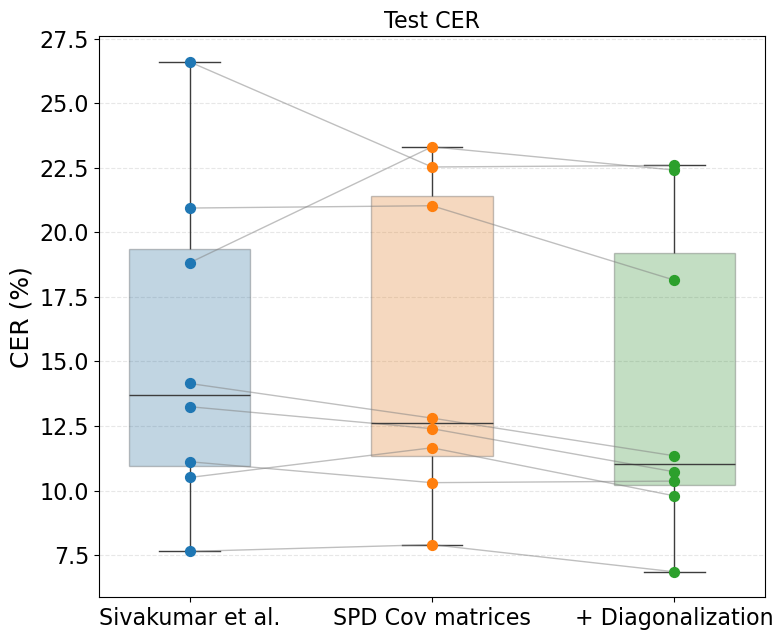

In [50]:
methodOrder = methods
method2idx = {m: i for i, m in enumerate(methodOrder)}

plt.figure(figsize=(8, 6.5))

sns.boxplot(
    x='Method', y='CER', data=df,
    order=methodOrder,
    palette=colors,
    width=0.5,
    showfliers=False,
    boxprops=dict(alpha=0.3)
)

for subjID in subjects:
    subjDF = df[df['Subject'] == subjID]
    xVals = subjDF['Method'].map(method2idx).values
    yVals = subjDF['CER'].values

    plt.plot(xVals, yVals, color='gray', alpha=0.5, linewidth=1)

    for i in range(len(methods)):
        plt.scatter(
            xVals[i], yVals[i],
            color=colors[i], s=50, zorder=3
        )

plt.xticks(ticks=np.arange(3), labels=methods, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("", fontsize=16)
plt.ylabel("CER (%)", fontsize=18)
plt.title("Test CER", fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("testCER-NoLM.pdf", bbox_inches="tight", dpi=300)
plt.show()


In [101]:
relImprovement = (testCER6 - testCER4) / testCER6
tStat, pT = ttest_1samp(relImprovement, 0, alternative = 'greater')
print(pT)

0.012741282016838667


In [102]:
relImprovement = (testCER5 - testCER3) / testCER3
tStat, pT = ttest_1samp(relImprovement, 0, alternative = 'greater')
print(pT)

0.020486780966399276


In [103]:
pValues = {"withLM_baseWithDiag": 0.0127, "withoutLM_baseWithDiag": 0.0205}